In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def adaline_fit(X, y, learning_rate=0.01, n_iter=100):
    weights = np.zeros(1 + X.shape[1])
    for _ in range(n_iter):
        errors = y - net_input(X, weights)
        weights[1:] += learning_rate * X.T.dot(errors)
        weights[0] += learning_rate * errors.sum()
    return weights

def madaline_fit(X, y, learning_rate=0.01, n_iter=100):
    weights = np.zeros(1 + X.shape[1])
    for _ in range(n_iter):
        for xi, target in zip(X, y):
            output = net_input(xi, weights)
            errors = target - output
            weights[1:] += learning_rate * xi * errors
            weights[0] += learning_rate * errors
    return weights

def net_input(X, weights):
    return np.dot(X, weights[1:]) + weights[0]

def predict(X, weights):
    return np.where(net_input(X, weights) >= 0.0, 1, -1)

In [3]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42) # Generate synthetic dataset
# Train ADALINE
adaline_weights = adaline_fit(X, y)
# Train MADALINE
madaline_weights = madaline_fit(X, y)

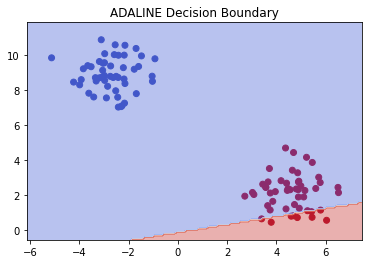

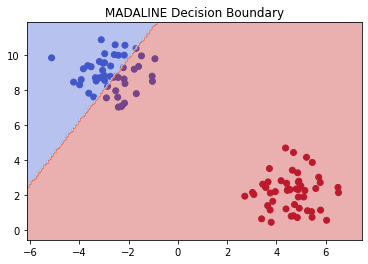

In [4]:
# Plot decision boundary for ADALINE
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title('ADALINE Decision Boundary')
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = predict(np.array([xx1.ravel(), xx2.ravel()]).T, adaline_weights)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap='coolwarm')
plt.show()

# Plot decision boundary for MADALINE
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title('MADALINE Decision Boundary')
Z = predict(np.array([xx1.ravel(), xx2.ravel()]).T, madaline_weights)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap='coolwarm')
plt.show()